In [37]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Blue_Bike_Stations.csv")

In [3]:
print(df.shape)
print(df.head())

(427, 10)
              X             Y  Number                                 Name  \
0 -7.916449e+06  5.212672e+06  K32015                       1200 Beacon St   
1 -7.923242e+06  5.215762e+06  W32006                          160 Arsenal   
2 -7.918062e+06  5.215631e+06  A32019                     175 N Harvard St   
3 -7.915794e+06  5.218121e+06  S32035                        191 Beacon St   
4 -7.914260e+06  5.204349e+06  C32094  2 Hummingbird Lane at Olmsted Green   

    Latitude  Longitude    District Public_  Total_docks  ObjectId  
0  42.344149 -71.114674   Brookline     Yes           15         1  
1  42.364664 -71.175694   Watertown     Yes           11         2  
2  42.363796 -71.129164      Boston     Yes           18         3  
3  42.380323 -71.108786  Somerville     Yes           19         4  
4  42.288870 -71.095003      Boston     Yes           17         5  


In [4]:
# Drop the columns we won't need
df.drop(["Number","Latitude","Longitude","Public_","ObjectId"],axis=1,inplace=True)
# df.drop(["Add_minX","Add_minY"],axis=1,inplace=True)

In [5]:
print(df.shape)
print(df.head())

(427, 5)
              X             Y                                 Name  \
0 -7.916449e+06  5.212672e+06                       1200 Beacon St   
1 -7.923242e+06  5.215762e+06                          160 Arsenal   
2 -7.918062e+06  5.215631e+06                     175 N Harvard St   
3 -7.915794e+06  5.218121e+06                        191 Beacon St   
4 -7.914260e+06  5.204349e+06  2 Hummingbird Lane at Olmsted Green   

     District  Total_docks  
0   Brookline           15  
1   Watertown           11  
2      Boston           18  
3  Somerville           19  
4      Boston           17  


In [6]:
# Two entries had 0 total docks, no need to consider those
df.drop(df[df["Total_docks"]==0].index,inplace=True)

In [7]:
# Dropping all the stations which are not in Boston
df.drop(df[df["District"]!="Boston"].index,inplace=True)

In [8]:
print(df.shape)
print(df.head())
df.reset_index(drop=True,inplace=True)    #Have to do this to reset the indices, otherwise the indices of removed rows are absent
print(df.head())

(245, 5)
              X             Y                                      Name  \
2 -7.918062e+06  5.215631e+06                          175 N Harvard St   
4 -7.914260e+06  5.204349e+06       2 Hummingbird Lane at Olmsted Green   
7 -7.916958e+06  5.201225e+06                      555 Metropolitan Ave   
8 -7.915898e+06  5.203884e+06  606 American Legion Hwy at Canterbury St   
9 -7.908122e+06  5.212315e+06                             645 Summer St   

  District  Total_docks  
2   Boston           18  
4   Boston           17  
7   Boston           18  
8   Boston           18  
9   Boston           19  
              X             Y                                      Name  \
0 -7.918062e+06  5.215631e+06                          175 N Harvard St   
1 -7.914260e+06  5.204349e+06       2 Hummingbird Lane at Olmsted Green   
2 -7.916958e+06  5.201225e+06                      555 Metropolitan Ave   
3 -7.915898e+06  5.203884e+06  606 American Legion Hwy at Canterbury St   
4 -7.9081

In [9]:
# For dumping the Dataframe into a pickle file
df.to_pickle("Dataframe.pkl")

In [10]:
from numpy.ma.core import sqrt
def dist(x1,y1,x2,y2):
  x = pow(x1-x2,2)
  y = pow(y1-y2,2)
  return sqrt(x+y)

In [11]:
a1 = df.iloc[0][["X","Y"]].tolist()
b1 = df.iloc[1][["X","Y"]].tolist()
print(a1)
print(b1)

[-7918062.31703125, 5215631.0608375]
[-7914259.53190626, 5204349.46890637]


In [12]:
print(a1[0])

-7918062.31703125


In [13]:
dist(a1[0],a1[1],b1[0],b1[1])

11905.271572180936

In [14]:
distDict = {}
pointsDict = {}
distances = []
for i in range(df.shape[0]):
  pointsDict[i] = df.iloc[i][["X","Y"]].tolist()
  for j in range(i+1,df.shape[0]):
    a = df.iloc[i][["X","Y"]].tolist()
    b = df.iloc[j][["X","Y"]].tolist()
    di = dist(a[0],a[1],b[0],b[1])
    distDict[(i,j)] = di
    distances.append(di)
print(len(distDict))

29890


```
## distDict is of the form - 
(0,1) : 7462, (0,2) : 8839 ....(423,424) : 3849
ie (a,b):dist(a,b), where a and b range from 0 to 424

## pointsDict is of the form - 
0 : [x0,y0], 1 : [x1,y1] ...
ie a:[x,y] where a ranges from 0 to 424 and x and y are its coordinates

## distances is of the form - 
[5343,22903,22904...]
It is simply a 1D array of _all_ the distances
```

In [15]:
print(len(distances))
print(max(distances))
print(min(distances))
print(sum(distances)/len(distances))

29890
24032.469814935692
33.95196850170113
7207.965041261901


In [16]:
print((423,425) in distDict)
print((243,244) in distDict)

False
True


In [19]:
# For dumping the distance dictionary into a pickle file
f = open("Distance dictionary.pkl","wb")
pickle.dump(distDict,f)
f.close()

In [18]:
# Dumping the points dictionary into a pickle file
f = open("Points dictionary.pkl","wb")
pickle.dump(pointsDict,f)
f.close()

In [ ]:
# For loading the dictionary from a pickle file
import pickle
f = open("Distance dictionary.pkl","rb")
distDict = pickle.load(f)
print(len(distDict))

90100


In [20]:
print(pointsDict)

{0: [-7918062.31703125, 5215631.0608375], 1: [-7914259.53190626, 5204349.46890637], 2: [-7916957.58240461, 5201224.51067718], 3: [-7915898.37744972, 5203884.49655678], 4: [-7908122.17334467, 5212314.85603592], 5: [-7915251.63792488, 5213493.96340703], 6: [-7910058.38553068, 5204772.24186421], 7: [-7905368.85605871, 5218853.53383933], 8: [-7907166.9330018, 5217370.72487295], 9: [-7911358.72408737, 5211541.83218866], 10: [-7916694.53778745, 5202835.99688582], 11: [-7917031.48964094, 5201909.58729688], 12: [-7910030.93303106, 5210612.06249078], 13: [-7909408.98658322, 5215045.88122788], 14: [-7910165.88787614, 5214356.41955238], 15: [-7917175.25542371, 5204920.69834483], 16: [-7910823.75601046, 5203871.61609401], 17: [-7915737.40946603, 5213613.94491203], 18: [-7912207.59643039, 5213262.70637706], 19: [-7913720.21123726, 5210459.92554216], 20: [-7911459.40143484, 5214464.42548043], 21: [-7913681.54775172, 5213677.33064556], 22: [-7918903.59181902, 5203969.64799094], 23: [-7919977.6000398,

In [21]:
counter = 0
for k,v in distDict.items():
  print(k,v)
  counter += 1
  if counter == 5:
    break

(0, 1) 11905.271572180936
(0, 2) 14448.845148215194
(0, 3) 11944.220649066563
(0, 4) 10478.72467411409
(0, 5) 3530.878427007525


In [22]:
distDF = pd.DataFrame(distances,columns=["Distances"])
distDF.to_csv("Dist.csv")

In [23]:
threshold = 3500

# Drop edges above threshold
delKeys = []
for k,v in distDict.items():
  if v>threshold:
    delKeys.append(k)
for key in delKeys:
  del distDict[key]

print(len(distDict))

f = open("Trimmed distance dictionary.pkl","wb")
pickle.dump(distDict,f)
f.close()

6187


In [24]:
# Just to check if all nodes are present or not
nodeSet = set()
for k in distDict:
  nodeSet.add(k[0])
  nodeSet.add(k[1])

In [25]:
print(nodeSet)
print(len(nodeSet))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

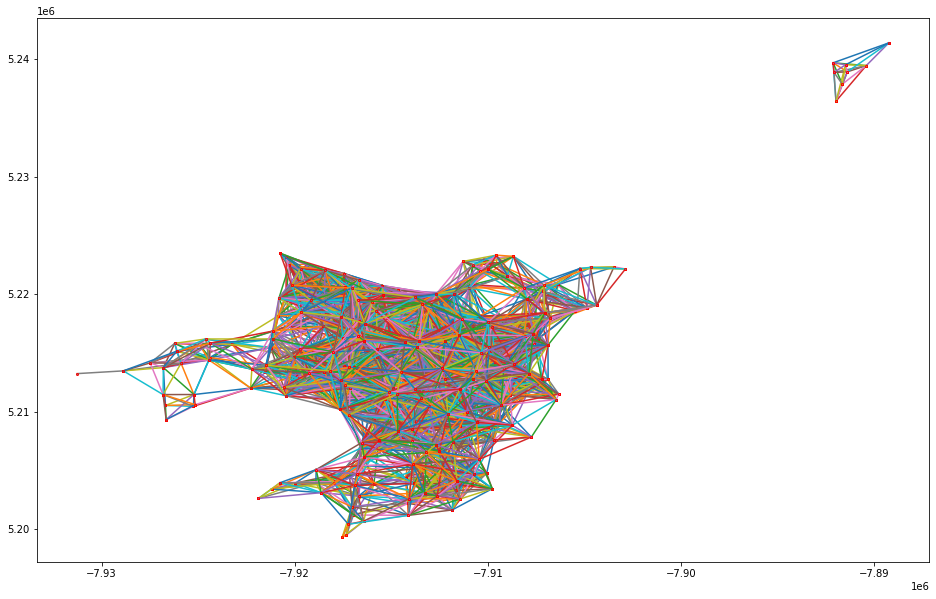

In [ ]:
# !! Don't run this again, it's useful for a comparison between just Boston nodes and all nodes

# Plotting all edges in the dictionary to check for unconnected components
plt.figure(figsize=(16,10))
for k in distDict:
  x = [pointsDict[k[0]][0],pointsDict[k[1]][0]]
  y = [pointsDict[k[0]][1],pointsDict[k[1]][1]]
  plt.plot(x,y,marker="o",markersize=2,markeredgecolor="red")

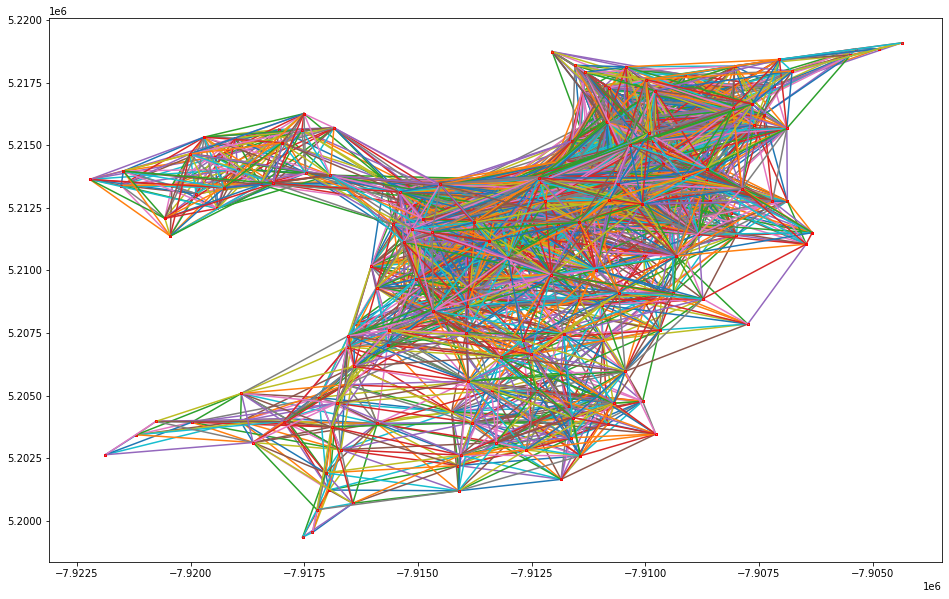

In [28]:
# For making graphs without some districts
plt.figure(figsize=(16,10))
count = 0
districts = ["Arlington","Brookline","Cambridge","Chelesea","Everett","Newton","Revere","Salem","Somerville","Watertown"]
for k in distDict:
  if df.iloc[k[0]]["District"] in districts or df.iloc[k[1]]["District"] in districts:
    continue
  x = [pointsDict[k[0]][0],pointsDict[k[1]][0]]
  y = [pointsDict[k[0]][1],pointsDict[k[1]][1]]
  count += 1
  plt.plot(x,y,marker="o",markersize=2,markeredgecolor="red")

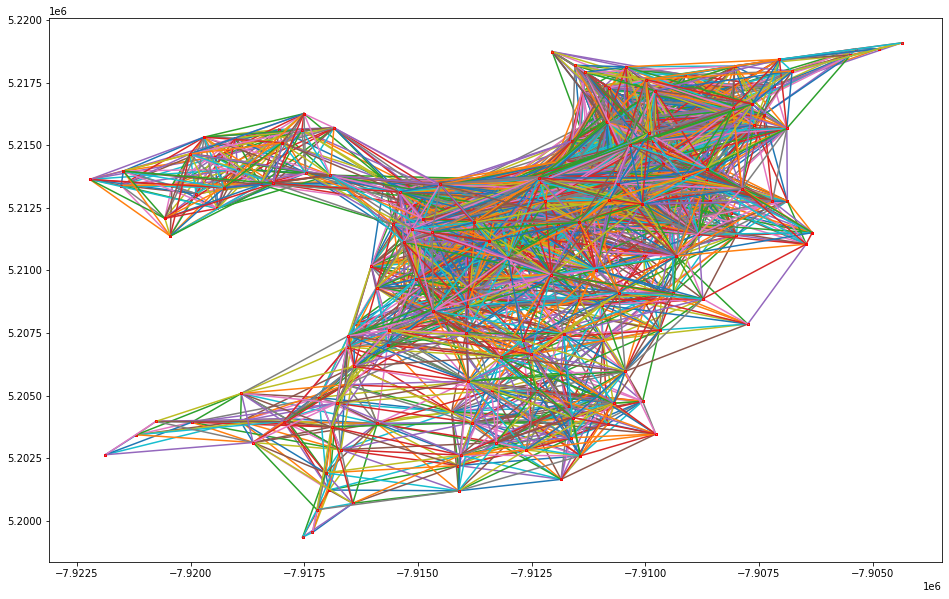

In [29]:
plt.figure(figsize=(16,10))
count = 0
for k in distDict:
  x = [pointsDict[k[0]][0],pointsDict[k[1]][0]]
  y = [pointsDict[k[0]][1],pointsDict[k[1]][1]]
  count += 1
  plt.plot(x,y,marker="o",markersize=2,markeredgecolor="red")

In [30]:
# Count of number of edges in the graph
print(count)

6187


In [31]:
class Node:
  def __init__(self,X,Y,name,district,docks,id):
    self.X = X
    self.Y = Y
    self.name = name
    self.district = district
    self.docks = docks
    self.ID = id

def nodePrint(self):
    print("Name - ",self.name)
    print("(X,Y) - (",self.X,",",self.Y,")")
    print("Docks - ",self.docks)
    print("ID - ",self.ID)

class Graph:
  def __init__(self,num):
    self.numVertices = num
    self.graph = [[0 for i in range(num)] for j in range(num)]      #Create a 2D matrix with all 0s of size num
    self.vertices = []

```
## Graph.graph is a 2D matrix of size num

## Graph.vertices is a 1D matrix, whose elements will be of type Node
```

In [32]:
len(pointsDict)

245

In [33]:
print(df.iloc[0]["Total_docks"])
print(df.iloc[0]["Name"])

18
175 N Harvard St


In [34]:
G = Graph(len(pointsDict))
# Here we make the adjacency matrix
for k,v in distDict.items():
  G.graph[k[0]][k[1]] = v
  G.graph[k[1]][k[0]] = v

# Here we add the nodes to the graph
for k,v in pointsDict.items():
  x = v[0]
  y = v[1]
  name = df.iloc[k]["Name"]
  id = k
  docks = df.iloc[k]["Total_docks"]
  district = df.iloc[k]["District"]
  vert = Node(x,y,name,district,docks,id)
  G.vertices.append(vert)

print(len(G.vertices))

245


In [35]:
print(G.vertices[0].name)

175 N Harvard St


In [38]:
print(np.shape(G.graph))

npG = np.array(G.graph)
print(npG[0:5,0:5])

(245, 245)
[[   0.            0.            0.            0.            0.        ]
 [   0.            0.            0.         1703.52986507    0.        ]
 [   0.            0.            0.         2863.11718519    0.        ]
 [   0.         1703.52986507 2863.11718519    0.            0.        ]
 [   0.            0.            0.            0.            0.        ]]


In [39]:
f = open("Adj list graph.pkl","wb")
pickle.dump(G.graph,f)
f.close()

In [40]:
G.graph[0][1]

0

In [41]:
distDict[(1,3)]

1703.5298650747584

In [42]:
# Dumping the Graph into a pickle file
f = open("Graph g.pkl","wb")
pickle.dump(G,f)
f.close()

In [ ]:
# Code for loading the graph.
# Need to run the cells where the two classes are defined first
import pickle
f = open("Graph g.pkl","rb")
G = pickle.load(f)
f.close()
print(len(G.vertices))